In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.shape

(400, 5)

In [7]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

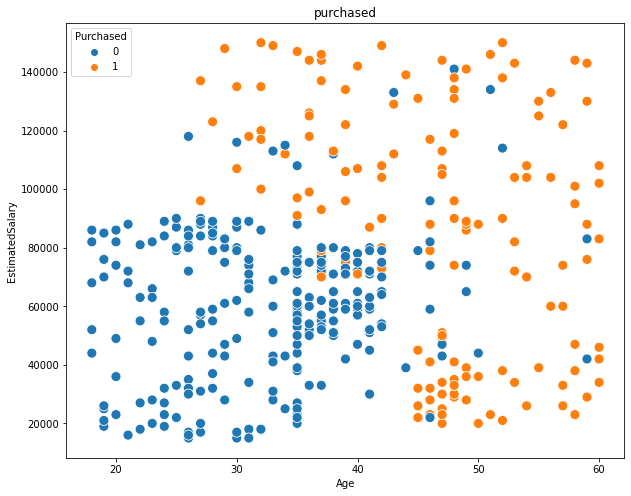

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Age' , y='EstimatedSalary' , hue = 'Purchased',data = df , s = 100)
plt.title('purchased')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
ax=plt.gca()

# Splitting dataset  into train and test

In [10]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2)

In [13]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


x_train (320, 2)
x_test (80, 2)
y_train (320,)
y_test (80,)


In [14]:
log_reg = LogisticRegression()


In [15]:
log_reg.fit(x_train,y_train)


LogisticRegression()

In [16]:
y_pred = log_reg.predict(x_test)

In [17]:
log_reg.coef_

array([[-2.24928194e-09, -2.79783384e-06]])

In [18]:
log_reg.intercept_

array([-2.22170371e-10])

In [19]:
log_reg.predict_proba(x_test)


array([[0.5383945 , 0.4616055 ],
       [0.55226776, 0.44773224],
       [0.53491602, 0.46508398],
       [0.56949313, 0.43050687],
       [0.56674724, 0.43325276],
       [0.52515927, 0.47484073],
       [0.52515927, 0.47484073],
       [0.54533994, 0.45466006],
       [0.56193215, 0.43806785],
       [0.52236775, 0.47763225],
       [0.53004051, 0.46995949],
       [0.55226775, 0.44773225],
       [0.59196922, 0.40803078],
       [0.55226776, 0.44773224],
       [0.54047981, 0.45952019],
       [0.54395216, 0.45604784],
       [0.59534379, 0.40465621],
       [0.5564149 , 0.4435851 ],
       [0.57838699, 0.42161301],
       [0.52446153, 0.47553847],
       [0.52934353, 0.47065647],
       [0.53213078, 0.46786922],
       [0.60072428, 0.39927572],
       [0.54186926, 0.45813074],
       [0.5202732 , 0.4797268 ],
       [0.5383945 , 0.4616055 ],
       [0.52306576, 0.47693424],
       [0.53282728, 0.46717272],
       [0.52655445, 0.47344555],
       [0.52097147, 0.47902853],
       [0.

# Evaluation (TF,FP,FN,TN,etc)


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[50,  0],
       [30,  0]], dtype=int64)

In [27]:
tp,fp,tn,fn = cm.ravel()
(tp,fp,tn,fn)

(50, 0, 30, 0)

In [28]:
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]



In [23]:

cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

cm_df

,Predicted Negative,Predicted Positive
Actual Negative,50,0
Actual Positive,30,0


In [24]:
from sklearn.metrics import accuracy_score , recall_score,precision_score,f1_score

In [25]:
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision Score:", p)
print("Recall Score:", r)
print("Accuracy Score:", a)
print("F1 Score:", f1)
print("TP",TP)
print("FP",FP)
print("TN",TN)
print("FN",FN)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.625
F1 Score: 0.0
TP 0
FP 0
TN 50
FN 30


C:\Users\Saurabh Rajesh Pande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
